# "COVID-19 India Matplotlib Overview"
> "Tracking coronavirus total cases, deaths and new cases in India"

- toc: true
- branch: master
- badges: true
- comments: true
- author: Jagriti Goswami
- categories: [fastpages, jupyter]

In [1]:
#hide

## Import essential packages below

import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.dates as mdates
import matplotlib as mpl
from IPython.core.display import display,HTML
%matplotlib inline

In [2]:
#hide

URL = "https://api.covid19india.org/csv/latest/states.csv"
r = requests.get(url = URL)
data = r.text

In [3]:
#hide

with open("data/Snapshot_StatewiseDaily.csv", "w") as file:
    file.write(data)

In [4]:
#hide

df = pd.read_csv('data/Snapshot_StatewiseDaily.csv') 

In [5]:
#hide

states_array = df['State'].unique()
states_array = np.delete(states_array,np.argwhere(states_array == 'India'))
states_array = np.delete(states_array,np.argwhere(states_array == 'State Unassigned'))              

In [6]:
#hide

dates_array = df['Date'].unique()
dates_array = dates_array[64:]

In [7]:
#hide

today = dt.date.today()
cdt_string = today.strftime("%Y-%m-%d")
pday = dt.date.today() - dt.timedelta(days=1)
pdt_string = pday.strftime("%Y-%m-%d")

In [8]:
#hide

def get_Info(dt_string):
    s_count = 0
    cases_array = np.array([],dtype = 'int')
    deaths_array = np.array([],dtype = 'int')
    while s_count < states_array.size:
        rslt_df = df[(df['Date'] == dt_string) & (df['State'] == states_array[s_count])]
        if(not rslt_df['Confirmed'].empty):
            cases_array = np.append(cases_array, rslt_df['Confirmed'])
        else:
            cases_array = np.append(cases_array, 0)
        if(not rslt_df['Deceased'].empty):
            deaths_array = np.append(deaths_array, rslt_df['Deceased'])
        else:
            deaths_array = np.append(deaths_array, 0)
        s_count+=1
    return cases_array, deaths_array

In [9]:
#hide

def create_stats_df(date_range):
    deaths_series_dict = {'states':states_array}
    cases_series_dict = {'states':states_array}
    for date in date_range:
        cases,deaths = get_Info(date)
        cases_series_dict[date] = cases
        deaths_series_dict[date] = deaths
    dft_cases = pd.DataFrame(cases_series_dict)
    dft_deaths = pd.DataFrame(deaths_series_dict)
    return dft_cases, dft_deaths

In [10]:
#hide

dft_cases,dft_deaths = create_stats_df(dates_array)

In [11]:
#hide
# your code here 
dt_today = cdt_string
dt_yday = pdt_string

In [12]:
#hide

# Get the latest count of the total number of cases for each state across India, and also one from a day before

#Here past cases are a day earlier, but this can be changed
dfc_cases = dft_cases.groupby('states')[dt_today].sum()
dfc_deaths = dft_deaths.groupby('states')[dt_today].sum()
dfp_cases = dft_cases.groupby('states')[dt_yday].sum()
dfp_deaths = dft_deaths.groupby('states')[dt_yday].sum()

In [30]:
#hide
# your code here
# df = pd.DataFrame({})
df = pd.concat([dfc_cases, dfp_cases, dfc_deaths, dfp_deaths],axis=1)
df.columns = ['Cases', 'PCases', 'Deaths', 'PDeaths']
df_table = df.sort_values(['Cases','Deaths'], ascending = [False, False])
df_table = df_table.reset_index()

In [31]:
#hide
df_table.head()

,states,Cases,PCases,Deaths,PDeaths
0,Maharashtra,503084,503084,17367,17367
1,Tamil Nadu,290907,290907,4808,4808
2,Andhra Pradesh,217040,217040,1939,1939
3,Karnataka,172102,172102,3091,3091
4,Delhi,144127,144127,4098,4098


In [32]:
#hide
for c in 'Cases, Deaths'.split(', '):
    df_table[f'{c} (+)'] = (df_table[c] - df_table[f'P{c}']).clip(0)
df_table['Fatality Rate'] = (100* df_table['Deaths']/ df_table['Cases']).round(2)

In [33]:
#hide
df_table

,states,Cases,PCases,Deaths,PDeaths,Cases (+),Deaths (+),Fatality Rate
0,Maharashtra,503084,503084,17367,17367,0,0,3.45
1,Tamil Nadu,290907,290907,4808,4808,0,0,1.65
2,Andhra Pradesh,217040,217040,1939,1939,0,0,0.89
3,Karnataka,172102,172102,3091,3091,0,0,1.80
4,Delhi,144127,144127,4098,4098,0,0,2.84
5,Uttar Pradesh,118038,118038,2028,2028,0,0,1.72
6,West Bengal,92615,92615,2005,2005,0,0,2.16
7,Telangana,79495,77513,627,615,1982,12,0.79
8,Bihar,75786,75786,419,419,0,0,0.55
9,Gujarat,69986,69986,2627,2627,0,0,3.75


In [34]:
#hide
# your code here
curr_date = today.strftime("%dth %B,%Y")
prev_date = pday.strftime("%dth %B,%Y")
summary = {'updated': curr_date, 'since': prev_date, 'Cases': df_table['Cases'].sum(),'PCases': df_table['PCases'].sum(), 'Deaths': df_table['Deaths'].sum(),'PDeaths': df_table['PDeaths'].sum(),'Cases (+)': df_table['Cases (+)'].sum(), 'Deaths (+)':df_table['Deaths (+)'].sum()}
summary

{'updated': '09th August,2020',
 'since': '08th August,2020',
 'Cases': 2156756,
 'PCases': 2152020,
 'Deaths': 43498,
 'PDeaths': 43453,
 'Cases (+)': 4736,
 'Deaths (+)': 45}

In [35]:
#hide_input
overview = '''
<!-- #######  HTML!! #########-->
<h1 style="color: #5e9ca0; text-align: center;">India</h1>
<p style="text-align: center;">Last update: <strong>{update}</strong></p>
<p style="text-align: center;">Confirmed cases:</p>
<p style="text-align: center;font-size:24px;">{cases} (<span style="color: #ff0000;">+{new}</span>)</p>
<p style="text-align: center;">Confirmed deaths:</p>
<p style="text-align: center;font-size:24px;">{deaths} (<span style="color: #ff0000;">+{dnew}</span>)</p>
'''

In [36]:
#hide_input
# Fill the above HTML with the information from the summary dictionary

update = summary['updated']
cases = summary['Cases']
new = summary['Cases (+)']
deaths = summary['Deaths']
dnew = summary['Deaths (+)']

html = HTML(overview.format(update=update, cases=cases,new=new,deaths=deaths,dnew=dnew))

display(html)

In [37]:
#hide
dt_cols = list(dft_cases.columns[1:])
dft_ct_new_cases = dft_cases.groupby('states')[dt_cols].sum().diff(axis=1).fillna(0).astype(int)
dft_ct_new_cases.sort_values(by = dt_today, ascending = False,inplace = True)

In [38]:
#hide
dft_ct_new_cases.head()

,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,...,2020-07-31,2020-08-01,2020-08-02,2020-08-03,2020-08-04,2020-08-05,2020-08-06,2020-08-07,2020-08-08,2020-08-09
states,,,,,,,,,,,,,,,,,,,,,
Telangana,0,1,1,1,8,3,3,2,6,6,...,1986,2083,1891,983,1286,2012,2092,2207,2256,1982
Odisha,0,0,1,0,0,1,0,0,0,0,...,1499,1602,1434,1384,1384,1337,1699,1833,1643,1734
Rajasthan,0,0,0,0,3,2,8,7,5,3,...,1147,1160,1167,1145,1124,1166,1151,1161,1171,596
Jharkhand,0,0,0,0,0,0,0,0,0,0,...,915,790,455,941,570,978,708,726,986,158
Tripura,0,0,0,0,0,0,0,0,0,0,...,274,252,141,0,131,122,98,128,146,147


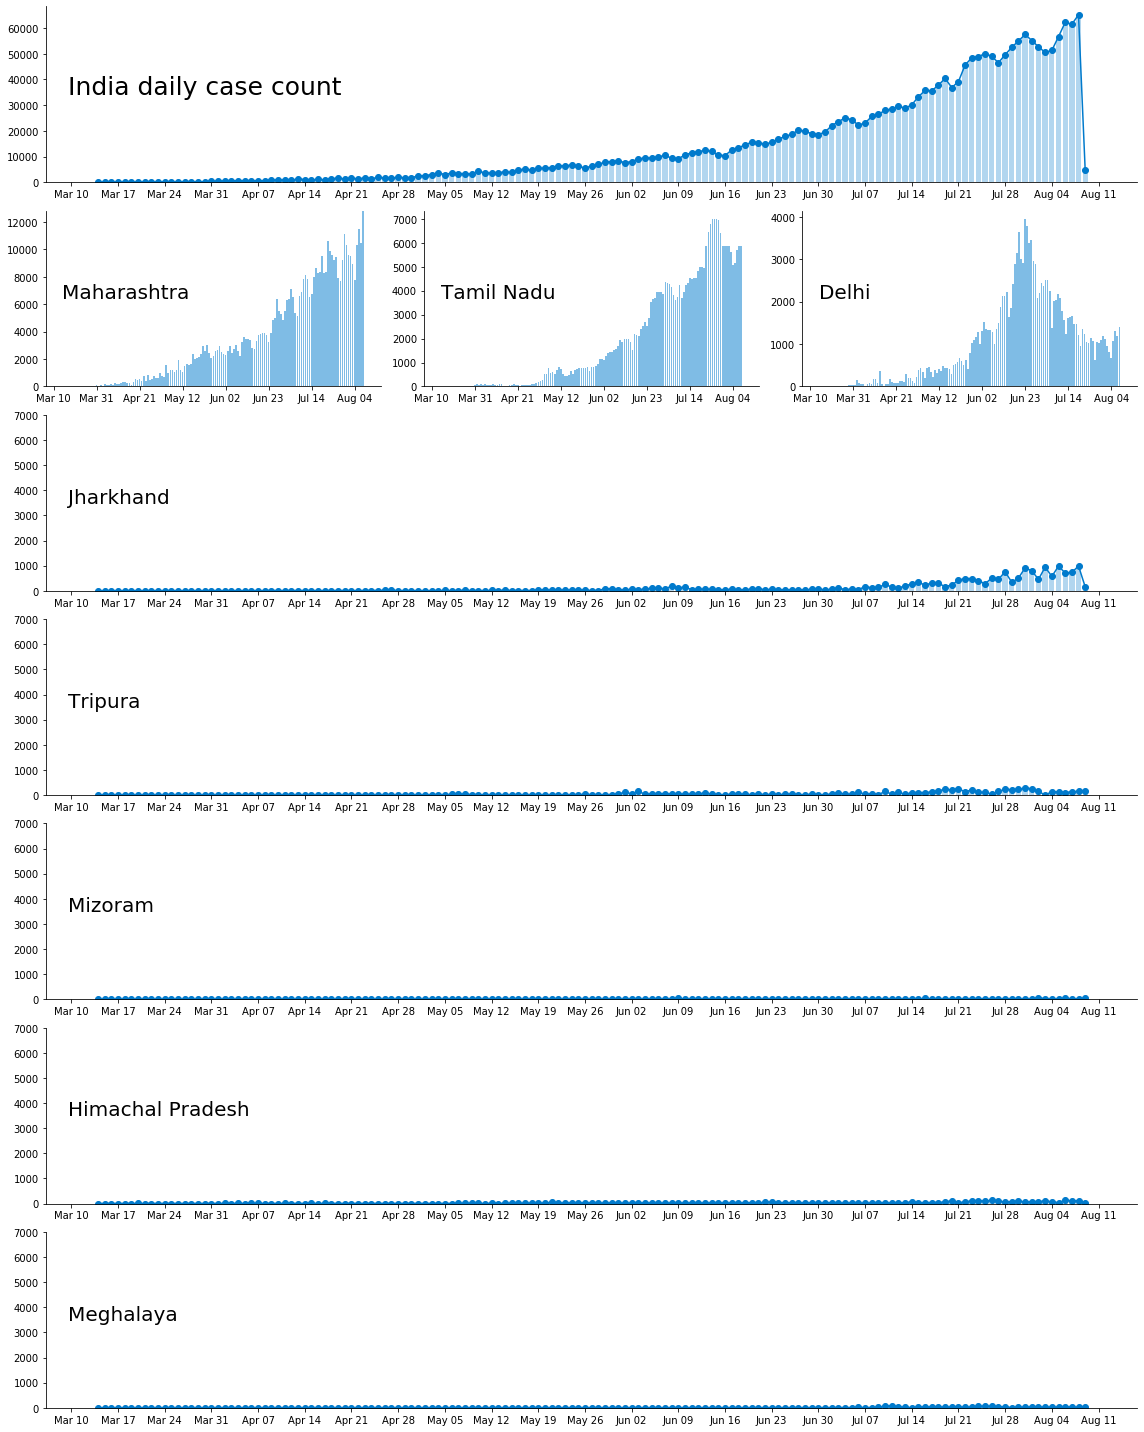

In [39]:
#hide_input
df = dft_ct_new_cases.copy()
df.loc['Total'] = df.sum()
n = 5
ax = []
fig = plt.figure(figsize = (16,20))
gs = fig.add_gridspec(n+2, 3)
# gs = fig.add_gridspec(2, 3)
ax1 = fig.add_subplot(gs[0, :])
ef = df.loc['Total'].rename_axis('date').reset_index()
ef['date'] = ef['date'].astype('datetime64[ns]')
ax1.bar(ef.date,ef.Total,alpha=0.3,color='#007acc')
ax1.plot(ef.date,ef.Total , marker="o", color='#007acc')
ax1.xaxis.set_major_locator(mdates.WeekdayLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax1.text(0.02, 0.5,'India daily case count', transform = ax1.transAxes, fontsize=25);
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

ax2 = fig.add_subplot(gs[1,0])
ef = df.loc['Maharashtra'].rename_axis('date').reset_index()
ef['date'] = ef['date'].astype('datetime64[ns]')

ax2.bar(ef.date, ef.Maharashtra,color = '#007acc',alpha=0.5)
ax2.xaxis.set_major_locator(mdates.WeekdayLocator())
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax2.set_xticks(ax2.get_xticks()[::3])
maxyval = ef.Maharashtra.max()
ax2.set_ylim([0,maxyval])
ax2.text(0.05, 0.5,'Maharashtra', transform = ax2.transAxes, fontsize=20);
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)


ax3 = fig.add_subplot(gs[1,1])
ef = df.loc['Tamil Nadu'].rename_axis('date').reset_index()
ef['date'] = ef['date'].astype('datetime64[ns]')
ax3.bar(ef.date, ef['Tamil Nadu'],color = '#007acc',alpha=0.5,)
ax3.xaxis.set_major_locator(mdates.WeekdayLocator())
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax3.set_xticks(ax3.get_xticks()[::3])
ax3.text(0.05, 0.5,'Tamil Nadu', transform = ax3.transAxes, fontsize=20);
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)

ax4 = fig.add_subplot(gs[1,2])
ef = df.loc['Delhi'].rename_axis('date').reset_index()
ef['date'] = ef['date'].astype('datetime64[ns]')
ax4.bar(ef.date, ef.Delhi,color = '#007acc',alpha=0.5)
ax4.set_xticks([])
ax4.xaxis.set_major_locator(mdates.WeekdayLocator())
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax4.set_xticks(ax4.get_xticks()[::3])
ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)

ax4.text(0.05, 0.5,'Delhi', transform = ax4.transAxes, fontsize=20)

for i in range(n):
    
    ax.append(fig.add_subplot(gs[i+2,:]))
    ef = df.iloc[i+3].rename_axis('date').reset_index()
    ef['date'] = ef['date'].astype('datetime64[ns]')
    ax[i].bar(ef.date,ef.iloc[:,-1],color = '#007acc',alpha=0.3)
    ax[i].plot(ef.date,ef.iloc[:,-1],marker='o',color='#007acc')
    ax[i].text(0.02,0.5,f'{ef.columns.values[-1]}',transform = ax[i].transAxes, fontsize = 20);
    ax[i].xaxis.set_major_locator(mdates.WeekdayLocator())
    ax[i].xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    ax[i].set_ylim([0,7000])
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
plt.tight_layout()



In [40]:
#hide_input
print(df_table.to_string(index=False))

                                   states   Cases  PCases  Deaths  PDeaths  Cases (+)  Deaths (+)  Fatality Rate
                              Maharashtra  503084  503084   17367    17367          0           0           3.45
                               Tamil Nadu  290907  290907    4808     4808          0           0           1.65
                           Andhra Pradesh  217040  217040    1939     1939          0           0           0.89
                                Karnataka  172102  172102    3091     3091          0           0           1.80
                                    Delhi  144127  144127    4098     4098          0           0           2.84
                            Uttar Pradesh  118038  118038    2028     2028          0           0           1.72
                              West Bengal   92615   92615    2005     2005          0           0           2.16
                                Telangana   79495   77513     627      615       1982          1